In [88]:
# create dummy 1000 circles from scikit

from sklearn.datasets import make_circles

# make 1000 circles
n_samples = 1000

# create circles - make a larger circle containing a smaller one in 2D
X,y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42 # for reproducibility
)

In [89]:
# the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [90]:
# the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

`visualize the data`

In [91]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
# get the first axis for X1 and the second axis for X2
circles.head(5)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


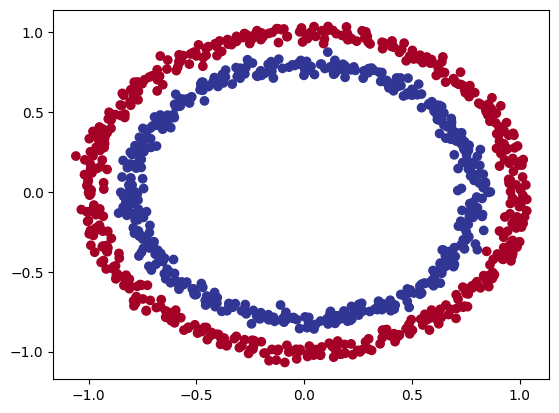

In [92]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu)

`check the shapes of our features and labels`

In [93]:
X.shape, y.shape # y are scalers

((1000, 2), (1000,))

In [94]:
len(X), len(y)

(1000, 1000)

In [95]:
# what is our first example like
X[5], y[5]
# given the two inputs, can we get the output - classify as a zero or a one

(array([-0.47964637,  0.67643477]), 1)

`Build a Neural Net to Classify either into blue or red circle`

In [96]:
import tensorflow as tf 
import numpy as np

In [97]:
# convert our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)

In [98]:
# X,y # they are now tensors
X.dtype, y.dtype

(tf.float64, tf.int64)

`create our datasets by indexing`

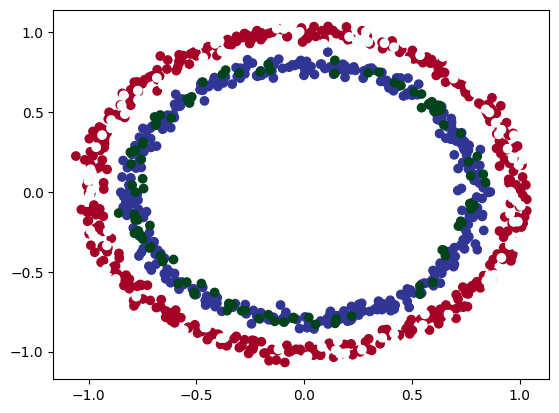

In [99]:
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

plt.scatter(X_train[:,0], X_train[:,1],c=y_train,cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test,cmap=plt.cm.BuGn)

In [100]:
# # using sckit to split our data - pops dtype error
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [101]:
# 1. set random seed
tf.random.set_seed(42)

# 2. create a model using the Sequential API
model = tf.keras.Sequential(
    [
        # tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Dense(100, activation='relu'), # rectifier linear unit
        tf.keras.layers.Dense(1, activation='sigmoid') # output layer
    ]
) 

# 3. Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.035), 
    metrics = 'accuracy' # accuracy - out of 100 examples, how many did our model get right?
)

# 3b Instantiate an EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

# 4. fit the model
model_def = model.fit(X_train, y_train, epochs=150, verbose=0, callbacks=[callback])

In [102]:
# see for how long the thing ran before being callback was initiated
len(model_def.history['accuracy'])

14

Text(0, 0.5, 'param to monitor')

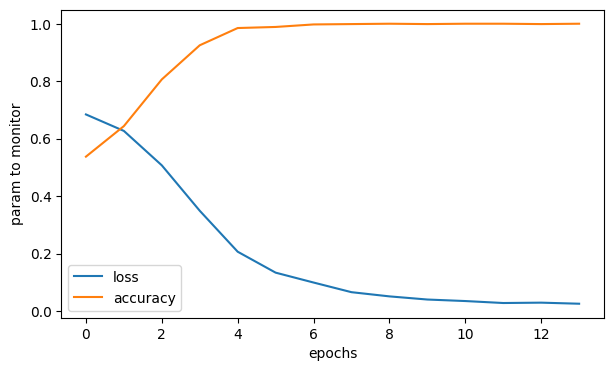

In [103]:
# plot the training before stopping occured
pd.DataFrame(model_def.history).plot(figsize=(7,4))
plt.xlabel('epochs')
plt.ylabel('param to monitor')

In [104]:
model.summary()
model.evaluate(X_test, y_test) # do not evaluate on the model that you have trained on

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (32, 100)                 300       
                                                                 
 dense_11 (Dense)            (32, 1)                   101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
7/7 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9850


[0.04903519153594971, 0.9850000143051147]

In [105]:
y_pred = model.predict(X_test)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[9.93827760e-01],
       [9.99902129e-01],
       [9.97124851e-01],
       [9.99321699e-01],
       [2.69026846e-01],
       [3.60915922e-02],
       [9.97019649e-01],
       [6.43081358e-03],
       [9.98553514e-01],
       [1.70240402e-02],
       [9.94334698e-01],
       [5.39923370e-01],
       [9.98846710e-01],
       [9.94433820e-01],
       [9.98681843e-01],
       [9.97373164e-01],
       [9.94561553e-01],
       [9.98539329e-01],
       [1.69832800e-02],
       [9.94566917e-01],
       [2.29050219e-02],
       [9.99479949e-01],
       [9.96990621e-01],
       [9.99426305e-01],
       [3.40952575e-02],
       [9.74741936e-01],
       [9.98572707e-01],
       [2.80779213e-01],
       [8.91233236e-03],
       [9.99550819e-01],
       [1.23870457e-02],
       [9.98793185e-01],
       [9.95953202e-01],
       [7.02227578e-02],
       [2.66101867e-01],
       [9.99350727e-01],
       [9.97741342e-01],
       [9.89039958e-01],
       [9.99823570e-01],
       [9.99959350e-01],


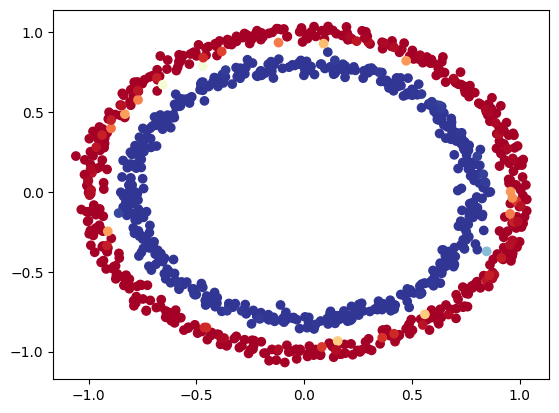

In [106]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_train,cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred,cmap=plt.cm.RdYlBu)

In [107]:
# save this model in a h5 format
model.save('circles.h5')

`to better understand the performance of the model`

In [108]:
def plot_decision_boundary(model, X, y):
    """
    Plot the decision boundaries created by a model predicting on X
    """

    # define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    
    # create X value - this is where we are going to make predictions on
    x_in = np.c_[xx.ravel(), yy.ravel()] #np.c_ - stacks 2D arrays together

    # make predictions
    y_pred_m = model.predict(x_in)

    # check for multiclass
    if len(y_pred_m[0]) > 1:
        print("performing multiclass classification")
        # therefore, we reshape our predictions and ready them for plotting
        y_pred_m = np.argmax(y_pred_m, axis=1).reshape(xx.shape)
    else:
        print("perfoming binary classification")
        y_pred_m = np.round(y_pred_m).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred_m, cmap=plt.cm.RdYlBu, alpha=1)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [109]:
# # check the prediction our model is making
# plot_decision_boundary(
#     model=model,
#     X=X_test,
#     y=y_test
# )

`create a learning rate callback`

In [110]:
# set random seed
tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(7, activation='relu'),
        tf.keras.layers.Dense(9, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# Compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(), # we are going to set up a lr callback
    metrics = 'accuracy'
)

# Create a LR callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(f)
# Create an EarlyStopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=5)

# Pass in lr_scheduler into the fit
# Fit the model
model_sc = model.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[lr_scheduler,early_stop])

In [111]:
# # for the purpose of monitoring loss - eliminate EarlyStopping

# model_sc_loss = model.fit(X_train, y_train, epochs=250, verbose=2, callbacks=[lr_scheduler])

In [112]:
# trying to understand the functionality of the lambda

def f(epoch):
    return 1e-4 * 10**(epoch/20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(f)

`figured out a difference in performance while using lambda vs using my defined function f .... lambda defined has a better perfomance compared to def (f)`
* 3.5 seconds vs 2.4 seconds (these figures have been run on repeat)

In [113]:
# check for how many times it ran
len(model_sc.history['accuracy'])

47

<AxesSubplot: xlabel='epochs'>

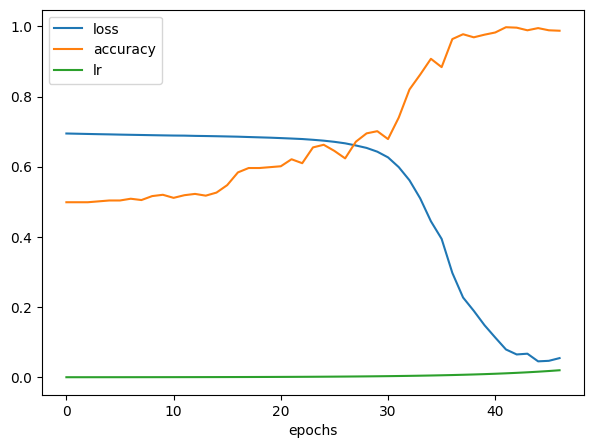

In [114]:
pd.DataFrame(model_sc.history).plot(figsize=(7,5), xlabel='epochs')

In [115]:
# check out the entire history
# pd.DataFrame(model_sc_loss.history).plot(figsize=(7,5), xlabel='epochs')

In [116]:
# # let us inspect the learning rate and loss params to determine what 
# # the best learning rate should be set at

# lrs = 1e-4*(10**(tf.range(250)/20))
# plt.figure(figsize=(7,4))
# plt.semilogx(lrs, model_sc_loss.history["loss"]) # monitor the loss values from the model training
# plt.xlabel("Learning Rate")
# plt.ylabel("Loss")
# plt.title("Learning Rate vs. Loss")


> From own findings:
* Having the model select the best param for you can trash my performance - for now:
* MANUALLY TUNE MY HYPERPARAMS

In [117]:
# let evaluate the performance of this model
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy*100


7/7 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9950


(0.03323366492986679, 99.50000047683716)

In [118]:
# implement a sckit-learn confusion matric - labels, predictions and pass to the function

from sklearn.metrics import confusion_matrix

# since we have our y_test and y_pred
confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [119]:
# lets evaluate the error - 
# ValueError: Classification metrics can't handle a mix of binary[1/0] and continuous[not 1/0] targets
y_pred[:10], y_test[:10]

(array([[0.99382776],
        [0.9999021 ],
        [0.99712485],
        [0.9993217 ],
        [0.26902685],
        [0.03609159],
        [0.99701965],
        [0.00643081],
        [0.9985535 ],
        [0.01702404]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])>)

`outputs from softmax and sigmoid are in probability form`

In [123]:
# convert our y_pred values to either 0/1
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[98,  3],
       [ 0, 99]])

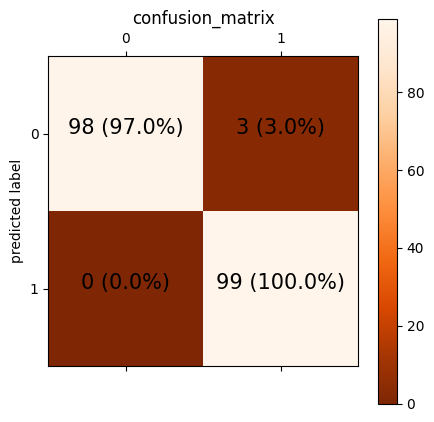

In [125]:
# pretify the confusion matrix

import itertools
a=b=5
figsize=(a,b)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# this is the beautyfying bit
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Oranges_r)
fig.colorbar(cax)

# create classes 
classes = False

if classes:
    labels = classes 
else:
    labels=np.arange(cm.shape[0])

# label the axes
ax.set(
    title="confusion_matrix",
    ylabel='predicted label',
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# set the threshold for different colors
threshold = (cm.max() + cm.min())

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
        horizontalalignment = "center",
        color = "white" if cm[i,j] > threshold else "black",
        size=15
    )